In [137]:
%reload_ext autoreload
%autoreload 2
from VirusHostNetworkAnalysis.pipeline import Pipeline
from VirusHostNetworkAnalysis.prediction_matrix import PredictionMatrix
from VirusHostNetworkAnalysis.properties import BipartiteGraph
from VirusHostNetworkAnalysis.null_model import ConfigurationModel

In [3]:
test = PredictionMatrix("tests/test_nestedness.tsv")
test.make_rectangular_matrix()

array([[ True, False,  True,  True,  True],
       [ True,  True,  True, False, False],
       [False,  True,  True,  True, False],
       [ True,  True, False, False, False],
       [ True,  True, False, False, False]])

In [ ]:
import numpy as np

test.virus_host_array = np.array([[0, 1, 1, 1],
                         [1, 0, 1, 0],
                         [1, 1, 0, 0],
                         [1, 0, 0, 0]])
test.rows = np.array(["node1", "node2", "node3", "node4"])
test.columns = np.array(["node1", "node2", "node3", "node4"])

In [91]:
print(test.virus_host_array)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [92]:
test_prop = BipartiteGraph(test)

In [93]:
print(test_prop.input_matrix)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [94]:
test_prop.initialize_graph()

In [95]:
print(test_prop.G)

Graph with 4 nodes and 0 edges


In [96]:
test_prop.calculate_clustering_coefficient()


0.0

In [89]:
import networkx as nx
total = 0
for node in test_prop.G.nodes():
    neighbours=[n for n in nx.neighbors(test_prop.G,node)]
    n_neighbors=len(neighbours)
    n_links=0
    if n_neighbors>1:
        for node1 in neighbours:
            for node2 in neighbours:
                if test_prop.G.has_edge(node1,node2):
                    n_links+=1
        n_links/=2 #because n_links is calculated twice
        clustering_coefficient=n_links/(0.5*n_neighbors*(n_neighbors-1))
        total+=clustering_coefficient
print(total/len(test_prop.G.nodes()))


0.5833333333333333


In [181]:
test.virus_host_array = np.array([[0, 1, 1, 1],
                         [1, 0, 1, 0],
                         [1, 1, 0, 0],
                         [1, 0, 0, 0],
                         [0, 1, 0, 0]])
test.rows = np.array(["v1", "v2", "v3", "v4", "v5"])
test.columns = np.array(["h1", "h2", "h3", "h4"])

test_cm = ConfigurationModel(test)
test_cm.curveball_method(1)

h2 h3
['v3', 'v5'] ['v2']
['v3'] ['v2']
[[0 1 1 1]
 [1 1 0 0]
 [1 0 1 0]
 [1 0 0 0]
 [0 1 0 0]]


[0.4, 0.7000000000000001] [0.6000000000000001, 0.0, 0.0, 0.0]


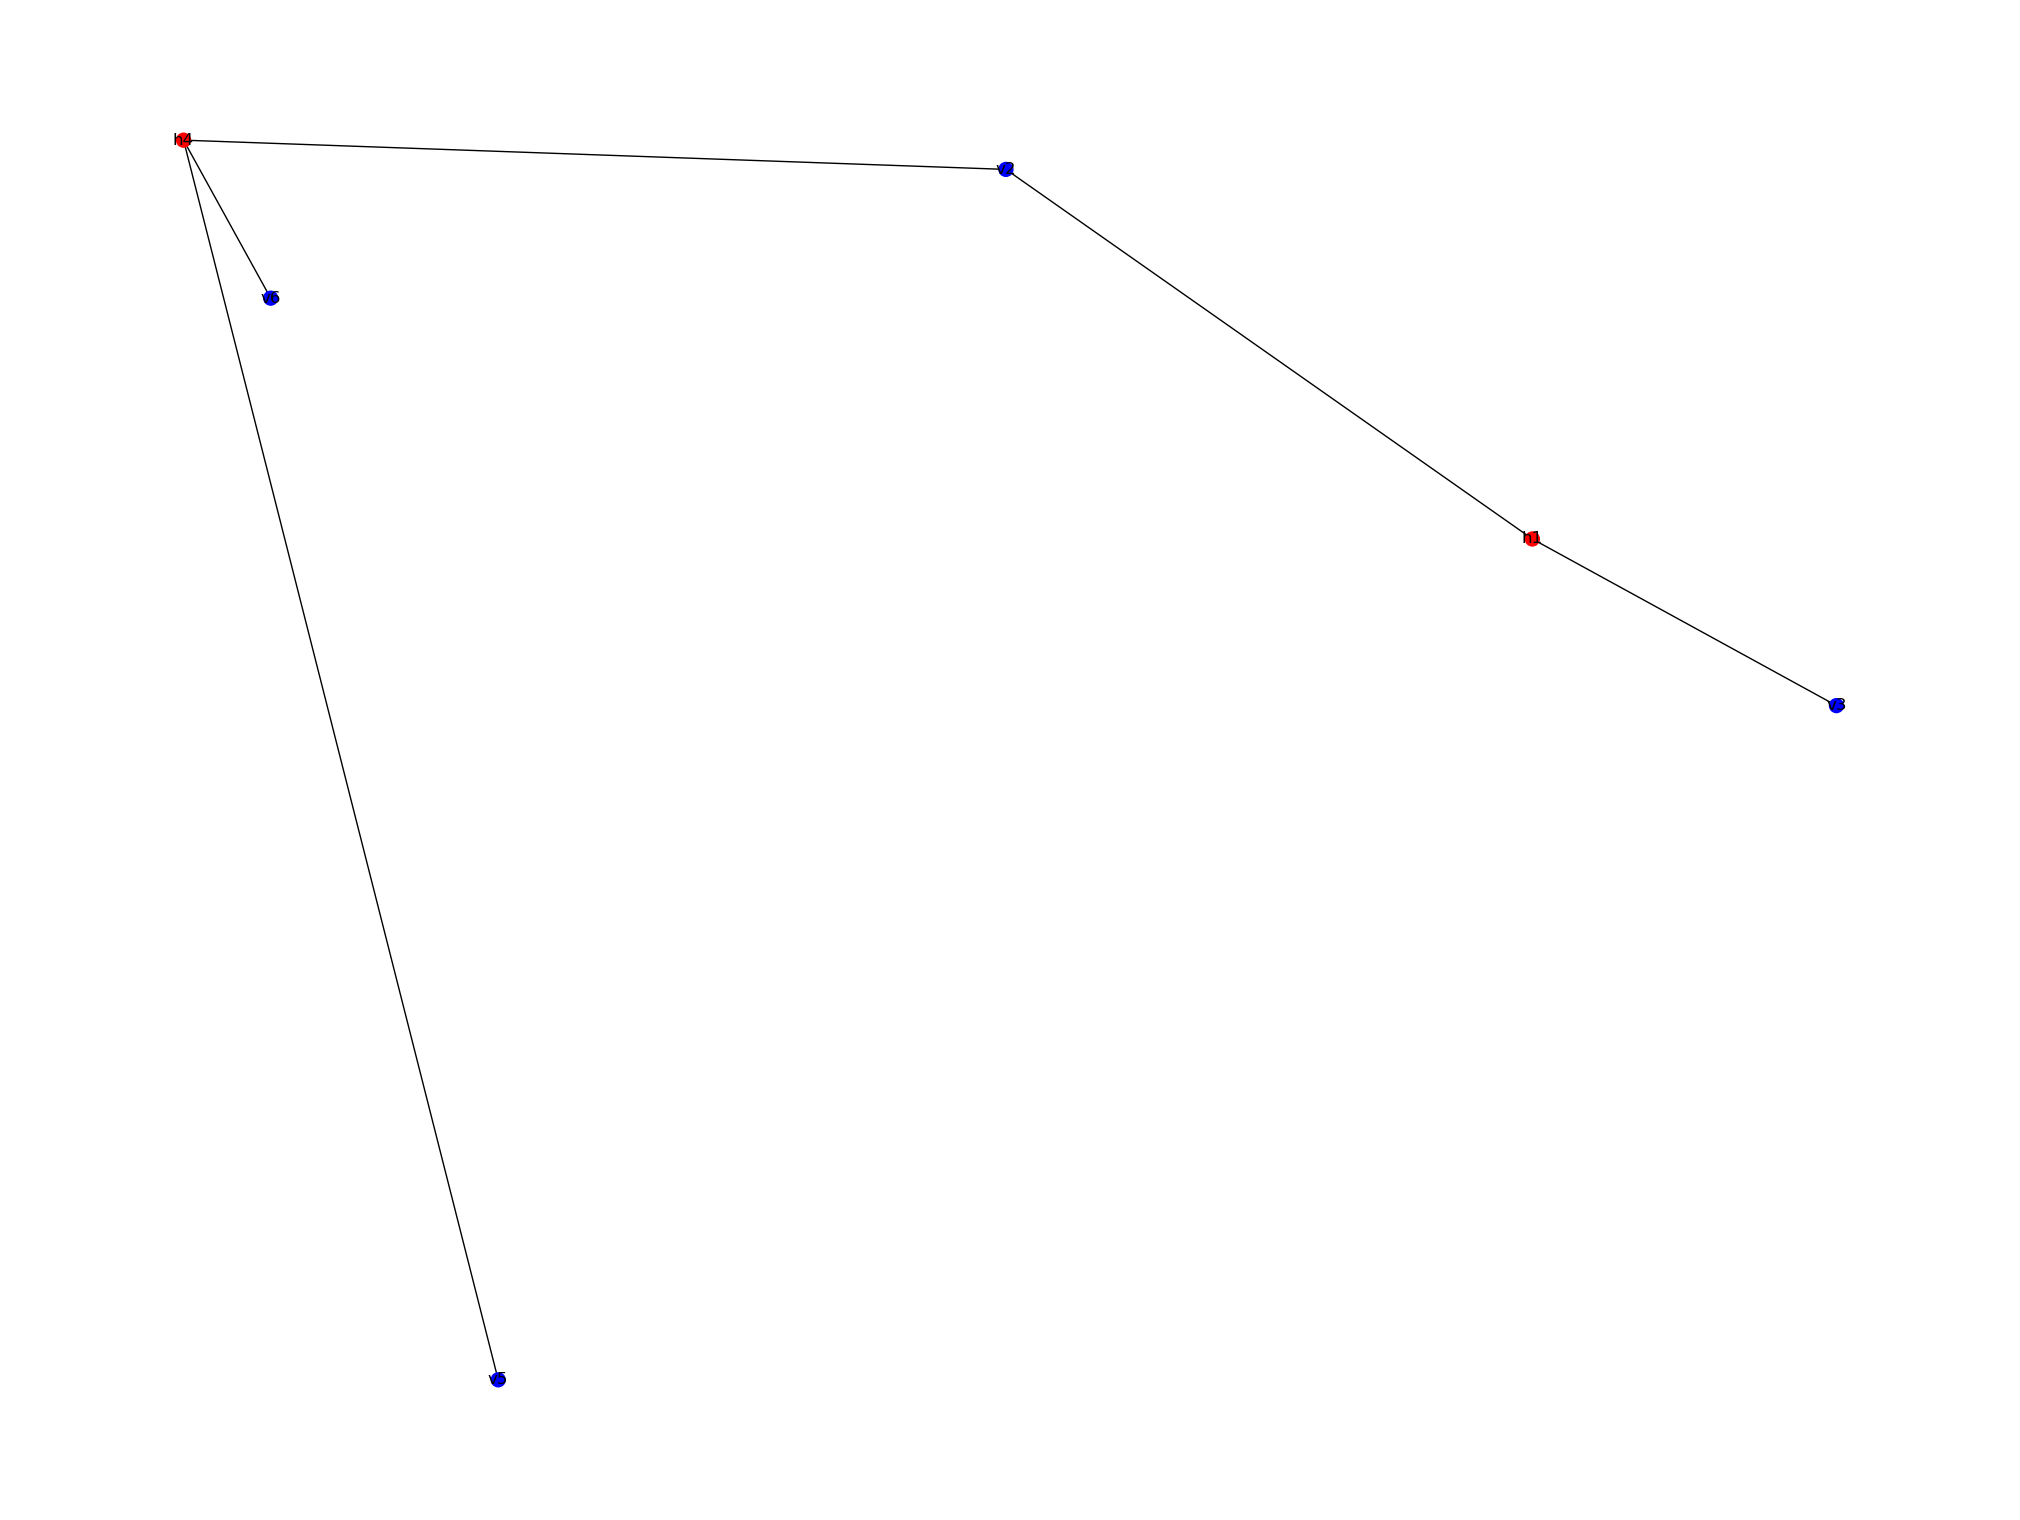

In [189]:
test_matrix = PredictionMatrix('tests/test_predictions.tsv', False)
test_matrix.make_rectangular_matrix()
test_properties = BipartiteGraph(test_matrix)

# Test #1
test_properties.input_matrix = np.array([[1, 1],
                                         [1, 0],
                                         [0, 1],
                                         [0, 1]])
test_properties.rows = np.array(["v2", "v3", "v5", "v6"])
test_properties.columns = np.array(["h1", "h4"])
test_properties.initialize_graph()
test_properties.draw_graph(True)
test_properties.calculate_centrality("betweenness")
print(list(test_properties.betweenness_host.values()), list(test_properties.betweenness_virus.values()))
